In [60]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [61]:
root = '../data'
paths = os.listdir(root)

paths_ecg = []
paths_ppg = []
paths_ecg_ppg = []
paths_fusion = []

paths_ecg_split = []
paths_ppg_split = []
paths_ecg_ppg_split = []
paths_fusion_slipt = []

for path in paths:
    path_completed = os.path.join(root, path)
    if 'ECG_PPG_FedAvgBio' in path:
        paths_ecg_ppg_split.append(path_completed)
    elif 'ECG_FedAvgBio' in path:
        paths_ecg_split.append(path_completed)
    elif 'PPG_FedAvgBio' in path:
        paths_ppg_split.append(path_completed)
    elif 'Fusion_FedAvgBio' in path:
        paths_fusion_slipt.append(path_completed)
    elif 'ECG_PPG' in path:
        paths_ecg_ppg.append(path_completed)
    elif 'ECG' in path:
        paths_ecg.append(path_completed)
    elif 'PPG' in path:
        paths_ppg.append(path_completed)
    elif 'Fusion' in path:
        paths_fusion.append(path_completed)

In [62]:
# Função para calcular a média de 'rs_test_acc' para uma lista de caminhos
def calculate_mean_accuracy(paths):
    acc = []
    loss = []
    frr = []
    fpr = []
    for path in paths:
        with h5py.File(path, 'r') as file:
            acc.append(file['rs_test_acc'][:])
            loss.append(file['rs_train_loss'][:])
            frr.append(file['rs_test_frr'][:])
            fpr.append(file['rs_test_fpr'][:])
    mean_acc = np.mean(np.array(acc), axis=0)
    mean_loss = np.mean(np.array(loss), axis=0)
    return mean_acc, mean_loss, frr, fpr

# Calculando as médias para cada conjunto de dados
acc_ecg, loss_ecg, frr_ecg, fpr_ecg = calculate_mean_accuracy(paths_ecg)
acc_ppg, loss_ppg, frr_ppg, fpr_ppg = calculate_mean_accuracy(paths_ppg)
acc_ecg_ppg, loss_ecg_ppg, frr_ecg_ppg, fpr_ecg_ppg = calculate_mean_accuracy(paths_ecg_ppg)
acc_fusion, loss_fusion, frr_fusion, fpr_fusion = calculate_mean_accuracy(paths_fusion)

# Calculando as médias para cada conjunto de dados
acc_ecg_slipt, loss_ecg_slipt, frr_ecg_slipt, fpr_ecg_slipt = calculate_mean_accuracy(paths_ecg_split)
acc_ppg_slipt, loss_ppg_slipt, frr_ppg_slipt, fpr_ppg_slipt = calculate_mean_accuracy(paths_ppg_split)
acc_ecg_ppg_slipt, loss_ecg_ppg_slipt, frr_ecg_ppg_slipt, fpr_ecg_ppg_slipt = calculate_mean_accuracy(paths_ecg_ppg_split)
acc_fusion_slipt, loss_fusion_slipt, frr_fusion_slipt, fpr_fusion_slipt = calculate_mean_accuracy(paths_fusion_slipt)

In [63]:
def draw_graph(*args, labels, ylabel = "Accuracy (%)"):
    indexes = np.arange(0, len(args[0]))

    styles = ['--', '--', '-.', ':']
    colors = ['c', 'g', 'r', 'b']
    for i, arg in enumerate(args):
        plt.plot(indexes, arg, label=labels[i], linestyle=styles[i], color=colors[i])  
    # Ajustes no gráfico
    plt.xlabel("Rounds", fontsize=15)
    plt.ylabel(ylabel, fontsize=15)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.xlim(0, 200)

    # Colocando a legenda acima do gráfico
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fontsize=12)

    # Adicionando a grade
    plt.grid(linestyle='--')

# Todos sem split

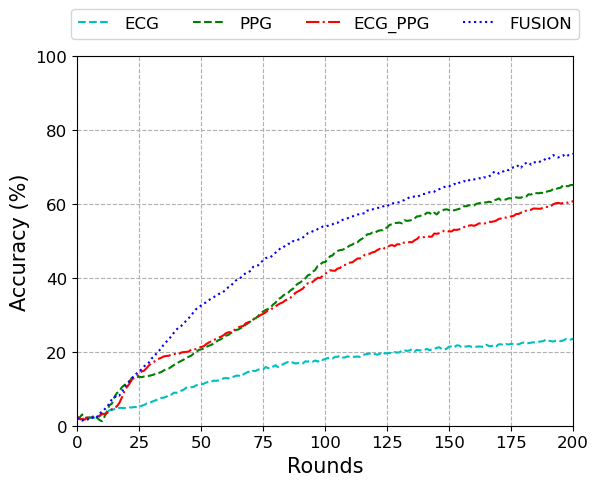

In [64]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(acc_ecg*100, acc_ppg*100, acc_ecg_ppg*100, acc_fusion*100, labels=labels)
plt.ylim(0, 100)
# Exibindo o gráfico
plt.savefig('acc.pdf', bbox_inches='tight')
plt.show()

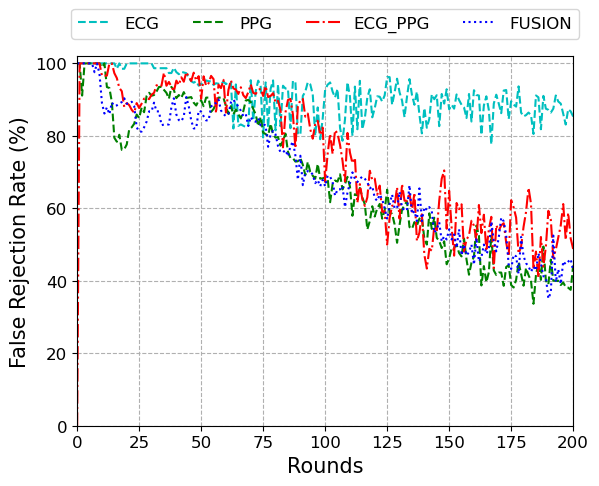

In [65]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(frr_ecg[0]*100, frr_ppg[0]*100, frr_ecg_ppg[0]*100, frr_fusion[0]*100, labels=labels, ylabel='False Rejection Rate (%)')
plt.ylim(0, 102)
# Exibindo o gráfico
plt.savefig('frr.pdf', bbox_inches='tight')
plt.show()

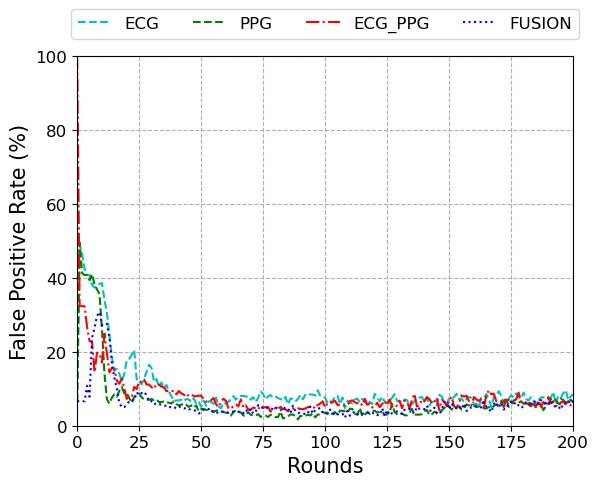

In [66]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(fpr_ecg[0]*100, fpr_ppg[0]*100, fpr_ecg_ppg[0]*100, fpr_fusion[0]*100, labels=labels, ylabel='False Positive Rate (%)')
plt.ylim(0, 100)
# Exibindo o gráfico
plt.savefig('fpr.pdf', bbox_inches='tight')
plt.show()

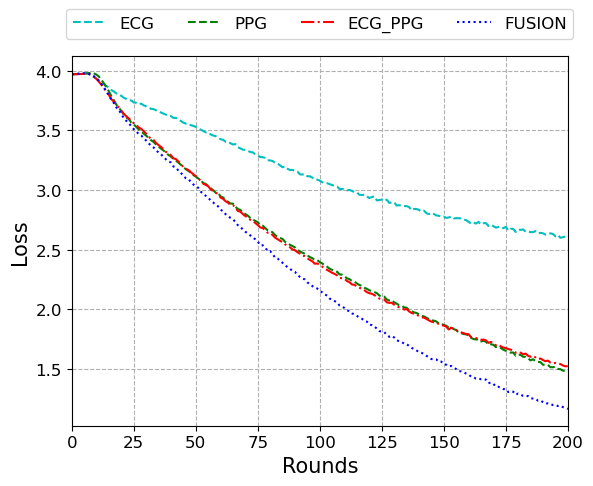

In [67]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(loss_ecg, loss_ppg, loss_ecg_ppg, loss_fusion, labels=labels, ylabel="Loss")
# Exibindo o gráfico
plt.savefig('loss.pdf', bbox_inches='tight')
plt.show()

# Todos com slipt

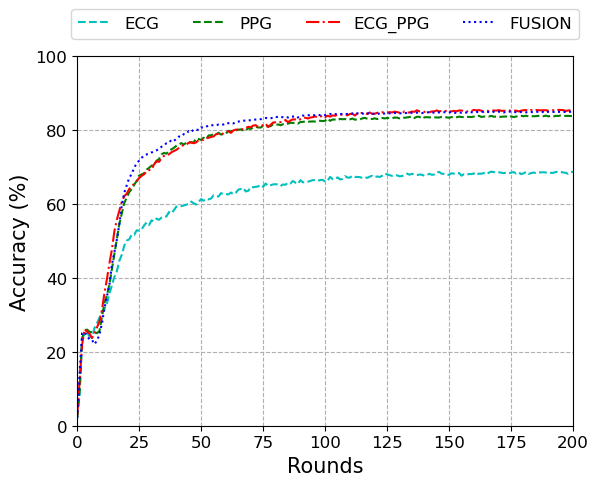

In [68]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(acc_ecg_slipt*100, acc_ppg_slipt*100, acc_ecg_ppg_slipt*100, acc_fusion_slipt*100, labels=labels)
plt.ylim(0, 100)
# Exibindo o gráfico
plt.savefig('acc_split.pdf', bbox_inches='tight')
plt.show()

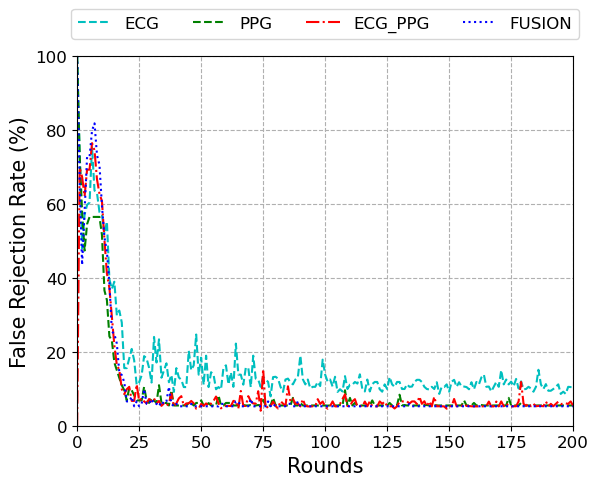

In [69]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(frr_ecg_slipt[0]*100, frr_ppg_slipt[0]*100, frr_ecg_ppg_slipt[0]*100, frr_fusion_slipt[0]*100, labels=labels, ylabel='False Rejection Rate (%)')
plt.ylim(0, 100)
# Exibindo o gráfico
plt.savefig('frr_split.pdf', bbox_inches='tight')
plt.show()

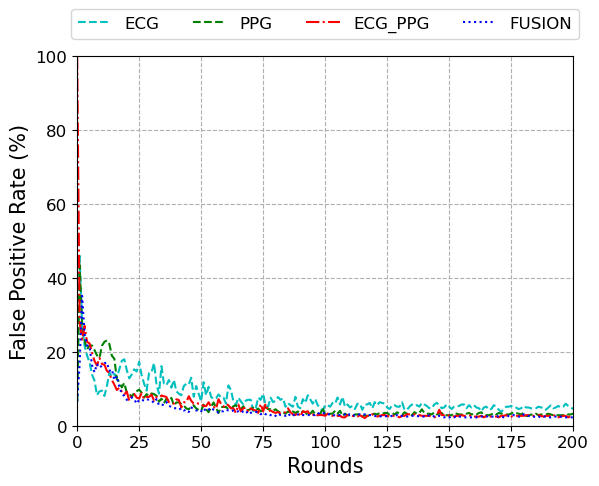

In [70]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(fpr_ecg_slipt[0]*100, fpr_ppg_slipt[0]*100, fpr_ecg_ppg_slipt[0]*100, fpr_fusion_slipt[0]*100, labels=labels, ylabel='False Positive Rate (%)')
plt.ylim(0, 100)
# Exibindo o gráfico
plt.savefig('fpr_split.pdf', bbox_inches='tight')
plt.show()

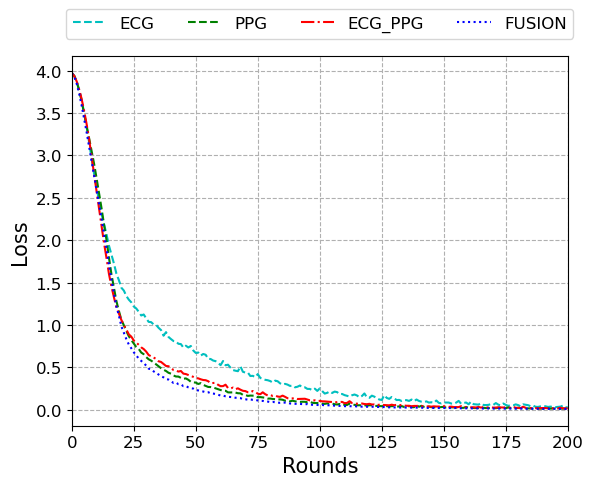

In [71]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(loss_ecg_slipt, loss_ppg_slipt, loss_ecg_ppg_slipt, loss_fusion_slipt, labels=labels, ylabel="Loss")
# Exibindo o gráfico
plt.savefig('loss_split.pdf', bbox_inches='tight')
plt.show()

# Fusion com slipt

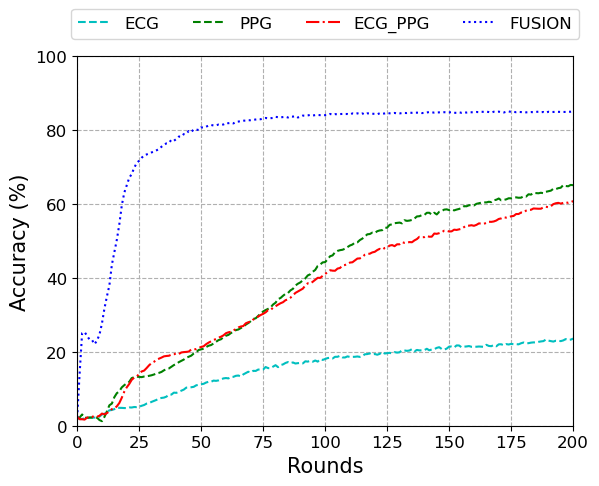

In [72]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(acc_ecg*100, acc_ppg*100, acc_ecg_ppg*100, acc_fusion_slipt*100, labels=labels)
plt.ylim(0, 100)
# Exibindo o gráfico
plt.savefig('acc_fusion_split.pdf', bbox_inches='tight')
plt.show()

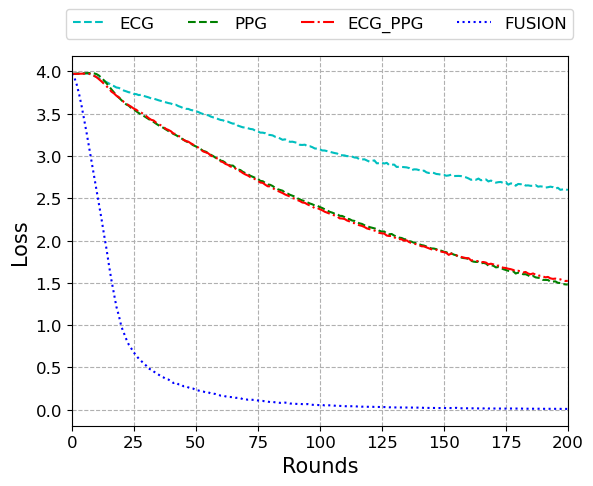

In [73]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(loss_ecg, loss_ppg, loss_ecg_ppg, loss_fusion_slipt, labels=labels, ylabel="Loss")
# Exibindo o gráfico
plt.savefig('loss_fusion_split.pdf', bbox_inches='tight')
plt.show()

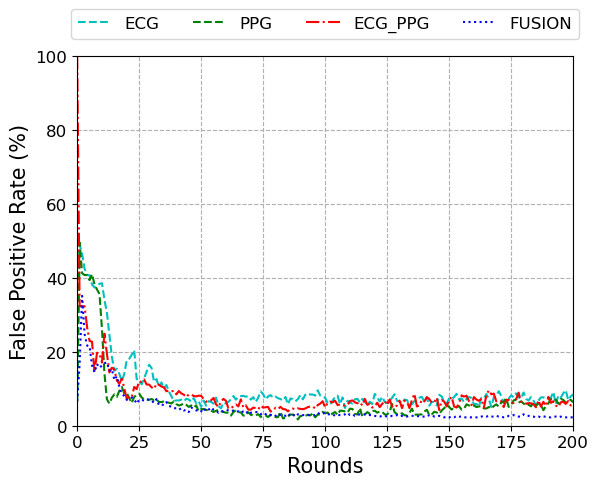

In [74]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(fpr_ecg[0]*100, fpr_ppg[0]*100, fpr_ecg_ppg[0]*100, fpr_fusion_slipt[0]*100, labels=labels, ylabel='False Positive Rate (%)')
plt.ylim(0, 100)
# Exibindo o gráfico
plt.savefig('fpr_fusion_split.pdf', bbox_inches='tight')
plt.show()

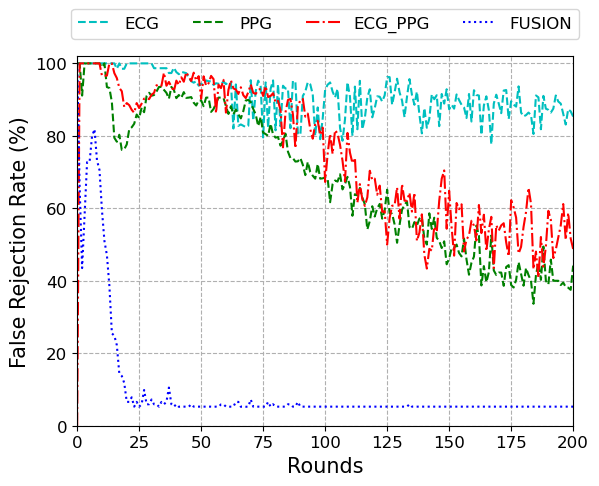

In [75]:
labels = ["ECG", "PPG", "ECG_PPG", "FUSION"]
draw_graph(frr_ecg[0]*100, frr_ppg[0]*100, frr_ecg_ppg[0]*100, frr_fusion_slipt[0]*100, labels=labels, ylabel='False Rejection Rate (%)')
plt.ylim(0, 102)
# Exibindo o gráfico
plt.savefig('frr_fusion_split.pdf', bbox_inches='tight')
plt.show()